# **Zomato**
# Restaurants Analytics Project
### Comprehensive Analysis: *Popularity, Cuisine Trends, Price vs Rating and Service Modes*
# ===============================================


In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1️⃣ Data Preprocessing

### 1. Data Overview

In [74]:
df = pd.read_csv("/content/drive/MyDrive/dataset/india_all_restaurants_details.csv", engine="python", on_bad_lines="skip")
print(df.shape)

(224520, 18)


In [75]:
df.head()

,Unnamed: 0,sno,zomato_url,name,city,area,rating,rating_count,telephone,cusine,cost_for_two,address,coordinates,timings,online_order,table_reservation,delivery_only,famous_food
0,0,0,https://www.zomato.com/ncr/sainik-food-pandav-...,Sainik Food,Delhi NCR,Pandav Nagar,3.2,21,011 22486474 +91 9717806814,North Indian,300,"C 4/1, Opposite Mother Dairy, Pandav Nagar, Ne...","28.6177324058,77.2848711535","{'Mon': '1pm – 4pm, 7pm – 10:30pm', 'Tue': '1p...",False,False,False,NaN
1,1,1,https://www.zomato.com/mumbai/kunals-creamery-...,Kunal's Creamery & Eatery,Mumbai,Ambernath,3.6,51,+91 9561356690 +91 9637537499,"Street Food, Chinese, Fast Food",500,"Shop 14, Trishul Shivdham Complex, Shiv Mandir...","19.2058869331,73.1842865422","{'Mon': '10am – 12midnight', 'Tue': '10am – 12...",False,False,False,Penne Pasta
2,2,2,https://www.zomato.com/ncr/brij-palace-restaur...,Brij Palace Restaurant,Delhi NCR,Jasola,0,0,+91 9891828106,North Indian,250,"4, Okhla Bus Stand, Jamia Nagar, Near, Jasola,...","28.5630343606,77.2912229598","{'Mon': '12noon – 4pm, 7pm – 12midnight', 'Tue...",False,False,False,"Chana Masala , Butter Naan , Paneer Bhujia , D..."
3,3,3,https://www.zomato.com/ncr/sahib-hotel-paharga...,Sahib Hotel,Delhi NCR,Paharganj,0,0,+91 9670005455,North Indian,300,"121, Amrit Kaur Market, Opposite New Delhi Rai...","28.6424106380,77.2182980552","{'Mon': '6am – 11:30pm, 12midnight – 1am', 'Tu...",False,False,False,NaN
4,4,4,https://www.zomato.com/kolkata/chunkys-shibpur...,Chunky's,Kolkata,Shibpur,3.0,78,+91 8442828284,"Italian, Pizza, Continental",500,"523, G.T Road, Howrah., Shibpur, Howrah","22.5777582163,88.3307084441","{'Mon': '12noon – 3am', 'Tue': '12noon – 3am',...",True,False,False,NaN


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224520 entries, 0 to 224519
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         224520 non-null  int64 
 1   sno                224520 non-null  int64 
 2   zomato_url         224520 non-null  object
 3   name               224520 non-null  object
 4   city               224520 non-null  object
 5   area               224520 non-null  object
 6   rating             224520 non-null  object
 7   rating_count       224520 non-null  int64 
 8   telephone          224520 non-null  object
 9   cusine             224520 non-null  object
 10  cost_for_two       224520 non-null  object
 11  address            222734 non-null  object
 12  coordinates        224520 non-null  object
 13  timings            221556 non-null  object
 14  online_order       224520 non-null  bool  
 15  table_reservation  224520 non-null  bool  
 16  delivery_only      2

### 2. Typecasting

In [77]:
df['rating'] = pd.to_numeric(df['rating'], errors ='coerce')
df['cost_for_two'] = pd.to_numeric(df['cost_for_two'], errors='coerce')

### 3. Removing Duplicates and Unnecessary columns

In [78]:
df.drop(columns=["Unnamed: 0", "sno", "zomato_url", "telephone", "address", "coordinates", "timings"], axis=1, inplace=True)

In [79]:
print("Duplicates Before : ",df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates After : ",df.duplicated().sum())

Duplicates Before :  1162
Duplicates After :  0


### 4. Handling null Values

In [80]:
df.isna().sum()

,0
name,0
city,0
area,0
rating,27573
rating_count,0
cusine,0
cost_for_two,10004
online_order,0
table_reservation,0
delivery_only,0


In [81]:
df.describe()

,rating,rating_count,cost_for_two
count,195785.000000,223358.000000,213354.00000
mean,2.574916,95.988207,366.30320
std,1.575456,346.791361,231.61111
min,0.000000,0.000000,0.00000
25%,0.000000,0.000000,200.00000
50%,3.300000,11.000000,300.00000
75%,3.700000,59.000000,500.00000
max,4.900000,42621.000000,12000.00000


In [82]:
df.drop("famous_food",inplace=True, axis=1)

In [83]:
# Fill missing with median
df['rating'] = df['rating'].fillna(df['rating'].median())

In [84]:
# Replace 0 with NaN
df['cost_for_two'] = df['cost_for_two'].replace(0, np.nan)

# Fill missing with median
df['cost_for_two'] = df['cost_for_two'].fillna(df['cost_for_two'].median())


### 5. FINAL DATA AFTER PREPROCESSING

In [85]:
df.head()

,name,city,area,rating,rating_count,cusine,cost_for_two,online_order,table_reservation,delivery_only
0,Sainik Food,Delhi NCR,Pandav Nagar,3.2,21,North Indian,300.0,False,False,False
1,Kunal's Creamery & Eatery,Mumbai,Ambernath,3.6,51,"Street Food, Chinese, Fast Food",500.0,False,False,False
2,Brij Palace Restaurant,Delhi NCR,Jasola,0.0,0,North Indian,250.0,False,False,False
3,Sahib Hotel,Delhi NCR,Paharganj,0.0,0,North Indian,300.0,False,False,False
4,Chunky's,Kolkata,Shibpur,3.0,78,"Italian, Pizza, Continental",500.0,True,False,False


## 2️⃣ Restaurant Popularity Analysis


### 1. Top rated Restaurant in descending order of their rating count

In [86]:
# Top rated Restaurant in descending order of their rating count
top_rated_df = df.sort_values(by='rating_count', ascending=False)
top = top_rated_df.iloc[0]
print("Most Rated Restaurant based on customer reviews : ", top['name'])
print("Rating : ",top['rating'])
print("Rating count : ", top['rating_count'])
print("City : ", top['city'])

Most Rated Restaurant based on customer reviews :  Bawarchi
Rating :  4.5
Rating count :  42621
City :  Hyderabad


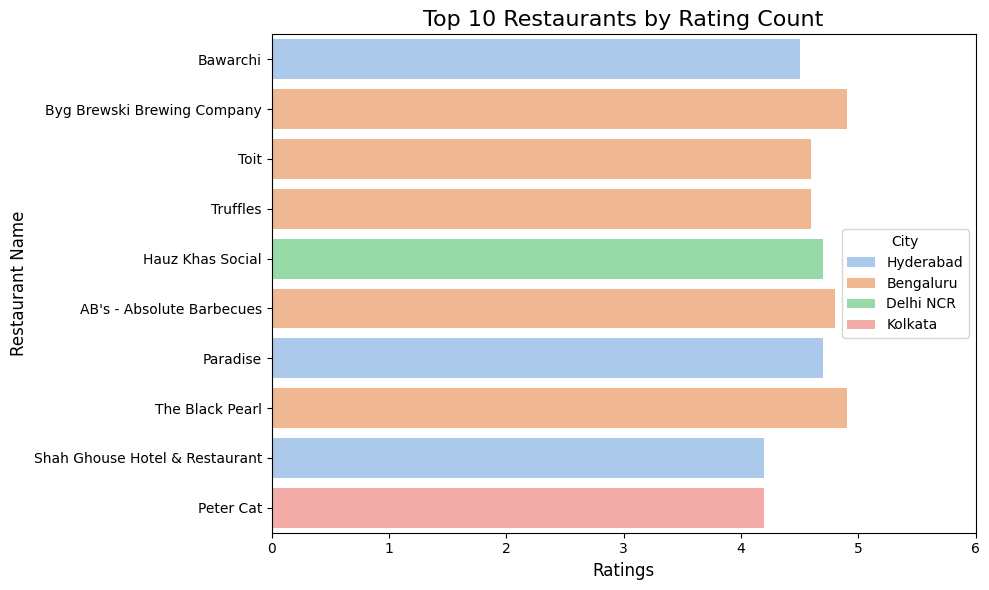

In [87]:
# Plot: Top Restaurants and rating
# Insight: Restaurants in Bangalore got higher number of rating counts with an average of 4.8 rating.
# Indictaing customers in Banglore prefer Zomato and also likes the food and serivices.
top10 = top_rated_df.head(10)
plt.figure(figsize=(10,6))
sns.barplot(data= top10, x='rating', y='name', palette='pastel', errorbar=None, hue='city')
plt.title('Top 10 Restaurants by Rating Count', fontsize=16)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Restaurant Name', fontsize=12)
plt.xlim(0,6)
plt.legend(title='City')
plt.tight_layout()
plt.show()

### 2. Top 10 cities with the highest number of restaurants listed on Zomato.

In [88]:
city = df['city'].value_counts()[-10:]

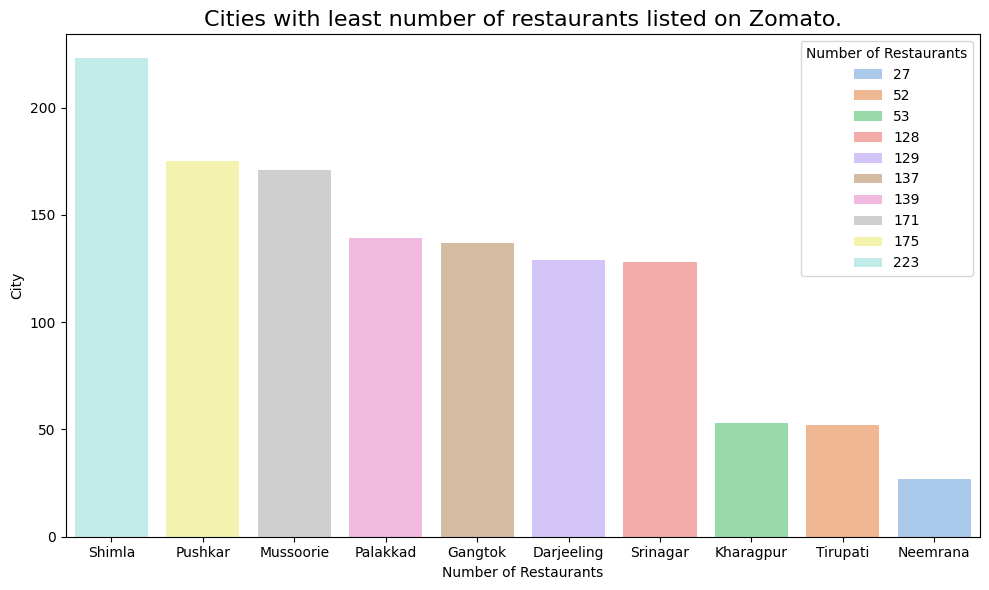

In [89]:
# Plot: cities with least number of restaurants
# Insight: Neemrana, Tirupati, Kharagpur etc have least restaurants tied up with zomato.
# So, need to focus on these cities to expand the business
plt.figure(figsize=(10,6))
sns.barplot(x=city.index, y=city, palette='pastel', hue=city)
plt.title('Cities with least number of restaurants listed on Zomato.', fontsize=16)
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.legend(title="Number of Restaurants")
plt.tight_layout()
plt.show()

### 3. Top Brands listed with Zomato

In [90]:
brand = df['name'].value_counts()[:10]

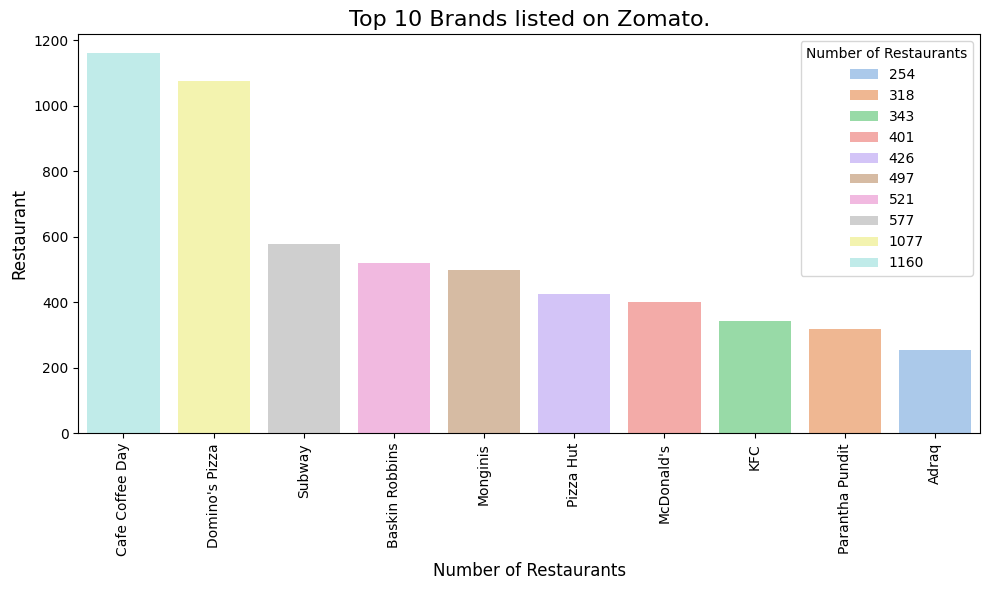

In [91]:
# Plot: Top Brands on Zomato
# Insight: CCD and Domino's are having highest number of restaurants on our platform.

plt.figure(figsize=(10,6))
sns.barplot(x=brand.index, y=brand, palette='pastel', hue=brand)
plt.title('Top 10 Brands listed on Zomato.', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Restaurant', fontsize=12)
plt.legend(title="Number of Restaurants")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 3️⃣ Cuisine Trends Across Cities

In [92]:
cusine_df = df[['city', 'cusine']]
cusine_df.head()

,city,cusine
0,Delhi NCR,North Indian
1,Mumbai,"Street Food, Chinese, Fast Food"
2,Delhi NCR,North Indian
3,Delhi NCR,North Indian
4,Kolkata,"Italian, Pizza, Continental"


In [93]:
cusine_df.loc[:,'cusine'] = cusine_df['cusine'].str.split(', ')
cusine_df = cusine_df.explode('cusine')
cusine_df

,city,cusine
0,Delhi NCR,North Indian
1,Mumbai,Street Food
1,Mumbai,Chinese
1,Mumbai,Fast Food
2,Delhi NCR,North Indian
...,...,...
224518,Dharamshala,North Indian
224519,Dharamshala,North Indian
224519,Dharamshala,Chinese
224519,Dharamshala,Fast Food


### 1. Top 10 cusines across INDIA

In [94]:
# Insight: Most of the Restaurants are offering North Indian and Chinese food
cusine_df['cusine'].value_counts()[:10]

,count
cusine,
North Indian,88226
Chinese,62561
Fast Food,56572
South Indian,25983
Beverages,22296
Desserts,21856
Biryani,17089
Bakery,16522
Street Food,14119


### 2. Trending, top 5 cusines across top 5 cities  

In [95]:
# top 5 cities
city5 = df['city'].value_counts().sort_values(ascending=False)[:5]
city5

,count
city,
Delhi NCR,38546
Mumbai,25535
Bengaluru,20170
Pune,15354
Hyderabad,12354


In [96]:
# cusine in top 5 city
top_cusine_df = cusine_df[cusine_df['city'].isin(city5.index)]
cusine = top_cusine_df.groupby(['city', 'cusine']).size().reset_index(name='count').sort_values(by=['city','count'],ascending=[True, False])

# top 5 cusines per city
cusine5 = cusine.groupby('city').head(5).reset_index(drop=True)

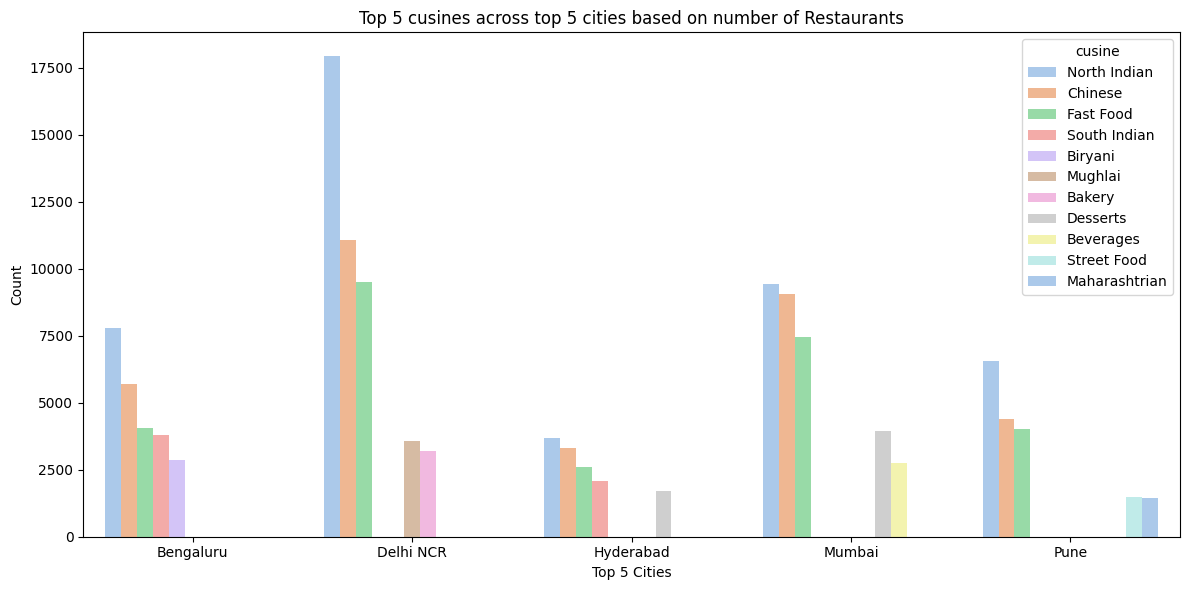

In [97]:
# Plot: Top 5 cusines across top 5 cities based on number of Restaurants
# Insight: In every top city based count of restaurants, North Indian food is restaurant's preffered food,
# Delhi is at the top.
plt.figure(figsize=(12,6))
sns.barplot(data=cusine5, x='city', y='count', hue='cusine', palette='pastel')
plt.xlabel('Top 5 Cities')
plt.ylabel('Count')
plt.title("Top 5 cusines across top 5 cities based on number of Restaurants")
plt.tight_layout()
plt.show()

## 4️⃣ Price vs Rating Correlation

### 1. Average cost for two of restaurants vs Rating count

In [98]:
# average cost for two of Restaurants
cost_rating_df = df.groupby(['name','rating']).agg({'cost_for_two':'mean', 'rating_count':'max'}).reset_index()
cost_rating_df.head()

,name,rating,cost_for_two,rating_count
0,"""D"" Pizzeria",3.3,500.0,50
1,"""D"" pizzeria",3.6,500.0,68
2,# Desi Patra Poda N More,3.3,150.0,0
3,# Spice Love,3.2,350.0,9
4,# Tag Cafe,0.0,350.0,0


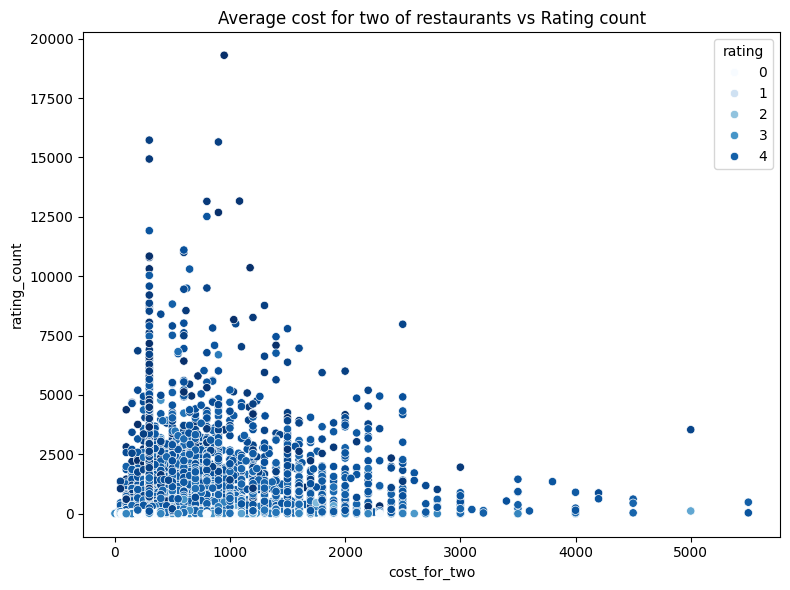

In [99]:
# Plot: Average cost for two of restaurants vs Rating count
# Insight: Restaurant with average cost for two around 300 get highest number
# of rating and also rating increases as rating count increase.
# Indicating customers prefer to buy food around 300 for cost for two
plt.figure(figsize=(8,6))
sns.scatterplot(data=cost_rating_df[(cost_rating_df['rating_count']<30000) & (cost_rating_df['cost_for_two']<6000)],
                x='cost_for_two', y='rating_count', hue='rating', palette='Blues')
plt.title("Average cost for two of restaurants vs Rating count")
plt.tight_layout()
plt.show()

### 2. Ratings Distribution Analysis

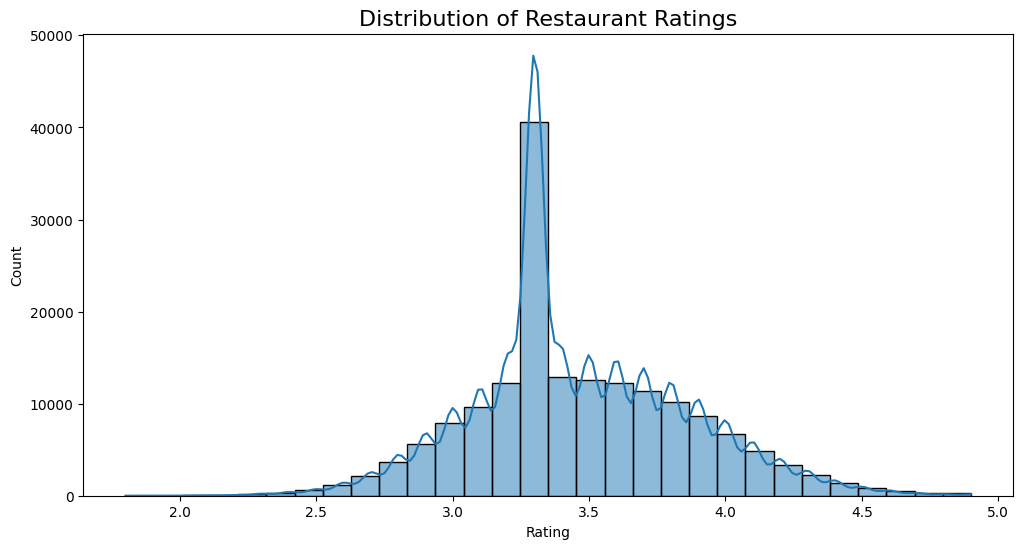

In [100]:
# removing 0 rating as its showing not rated
# Plot: rating distribution
# Insight: Most of the restarants have rating between 3.2-3.6, with a huge number of
# restaurants are having rating 3.3
plt.figure(figsize=(12,6))
sns.histplot(df[df['rating'] > 0]['rating'], bins=30, kde=True)
plt.title("Distribution of Restaurant Ratings", fontsize=16)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

### 3. Cost Distribution

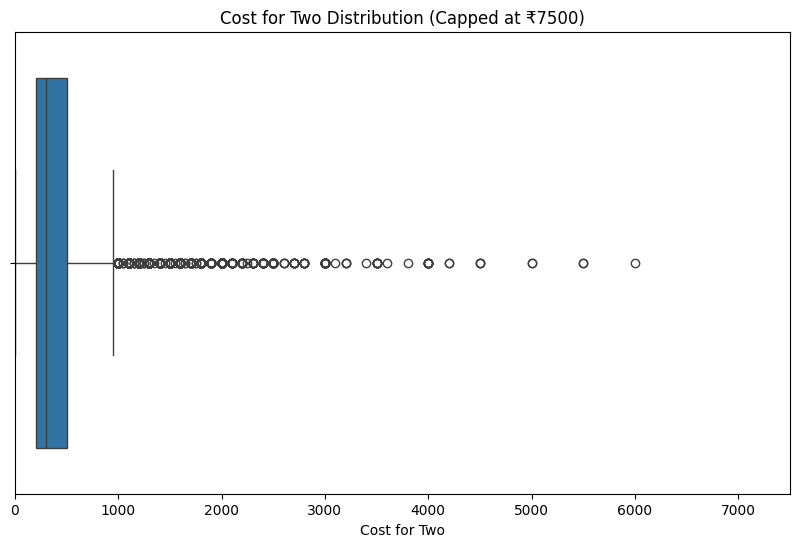

In [101]:
# limiting cost till 7500 as we have extreme outlier
# Plot: Cost for two
# Insight: 50% of restaurants are having cost for two aroung 300.
# and few of the restaurants are having more than 1000 as cost for two.
plt.figure(figsize=(10,6))
sns.boxplot(x=df["cost_for_two"])
plt.xlim(0, 7500)
plt.title("Cost for Two Distribution (Capped at ₹7500)")
plt.xlabel("Cost for Two")
plt.show()


### 4. Rating vs Cost Analysis


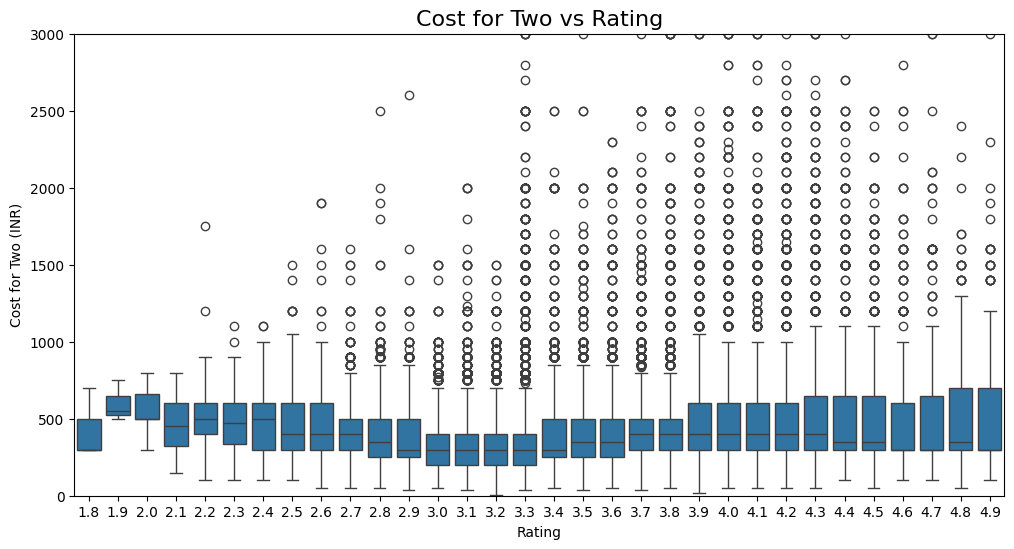

In [102]:
# Plot: Cost for two vs rating
# Insight: Restaurants with rating between 2.9-3.3 are having least cost for two
# and rating increases as cost for two increases after 3.3
plt.figure(figsize=(12,6))
sns.boxplot(x="rating", y="cost_for_two", data=df[df['rating'] > 0])
plt.ylim(0, 3000)  # cap at ₹3000 because of outliers
plt.title("Cost for Two vs Rating", fontsize=16)
plt.xlabel("Rating")
plt.ylabel("Cost for Two (INR)")
plt.show()


## 5️⃣ Service Modes Analysis

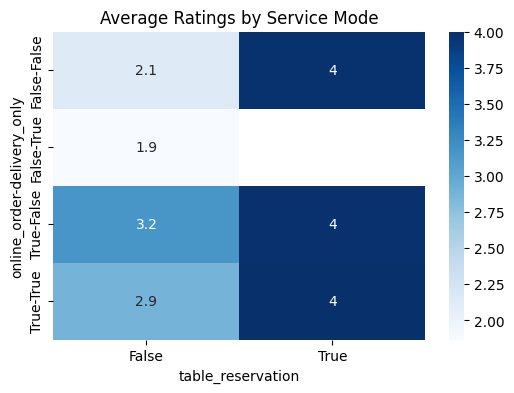

In [103]:
# Plot: Rating vs service modes
# Insight: Restaurants providing table services are having higher rating and only delivery
# restaurants are least rated
plt.figure(figsize=(6,4))
sns.heatmap(df.groupby(['online_order','delivery_only','table_reservation'])['rating'].mean().unstack(), annot=True, cmap="Blues")
plt.title("Average Ratings by Service Mode")
plt.show()


## 6️⃣ Correlation Heatmap of Numeric Features

In [104]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

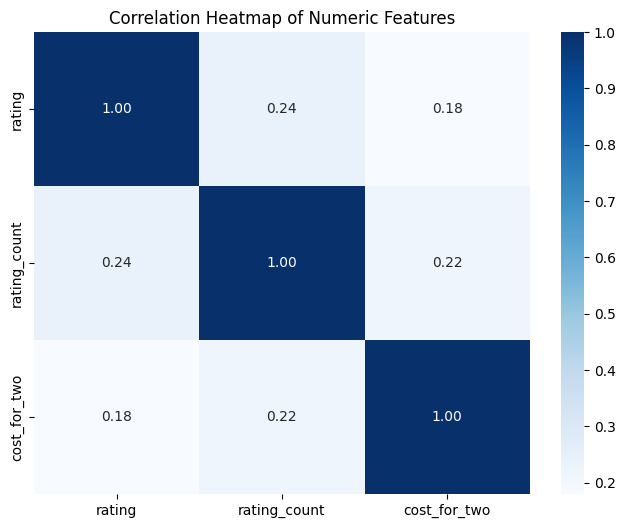

In [105]:
# Plot: Correlation Heatmap
# Insight: rating count is more related to rating, indicating increase in rating
# with increase in rating count.
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="Blues", fmt=".2f")

plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# 📊 Summary Insights

1. Customers in **Bangalore** show a strong preference for Zomato and express higher satisfaction with food and services.  
2. Restaurants offering **both dine-in and online ordering** attract more customers compared to those with only one service.  
3. Cities like **Neemrana, Tirupati, and Kharagpur** have fewer Zomato-partnered restaurants — indicating **potential markets for expansion**.  
4. **CCD and Domino's** dominate with the highest number of restaurant outlets listed on Zomato.  
5. **North Indian cuisine** is the most preferred food type, with **Delhi** leading the demand.  
6. About **50% of restaurants have an average cost for two around ₹300**, while a small segment charges **₹1000+**, showing a **wide affordability gap** across restaurants.  

---

# 💡 Business Recommendations

1. **Leverage Bangalore's strong user base**  
   - Strengthen partnerships with top restaurants.  
   - Launch **loyalty/reward programs** to lock in repeat customers.  

2. **Promote hybrid dining models**  
   - Encourage restaurants to offer **both dine-in and delivery**.  
   - Provide incentives (reduced commission, promotions) for those enabling online ordering.  

3. **Expand into Tier-2/Tier-3 cities**  
   - Onboard more local restaurants in **Neemrana, Tirupati, Kharagpur**.  
   - Offer **onboarding discounts or marketing support** to attract small restaurant owners.  

4. **Balance chain dominance and local growth**  
   - Build **exclusive campaigns** with CCD and Domino's.  
   - Support smaller/local restaurants with **visibility boosts** to diversify offerings.  

5. **Capitalize on cuisine preferences**  
   - Highlight **North Indian cuisine** in marketing campaigns.  
   - Encourage non-North Indian restaurants to **add North Indian dishes** to menus.  

6. **Utilize pricing segmentation**  
   - Launch **premium plans (Zomato Gold / Elite)** for higher-spending customers.  
   - Promote **budget-friendly restaurants** in Tier-2/3 cities to grow the user base.  
